# Programming for Data Analysis - ATU 2022/23

# Project 2

# David Higgins - G00411302

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn import svm
from sklearn import tree
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## History of the Wisconsin breast cancer dataset



This dataset is one of a pair created from data collected by Dr. William Wolberg at the University of Wisconsin Hospitals over an almost 3 year time period, from January 1989 to November 1991. The first dataset, known as the original, was the amalgamation of 8 separate groups of data submitted by Dr. Wolberg to the researchers. Each instance contained 11 attributes; an ID number, nine characteristics of the tissue sample and a classification of malignant or benigh. There are 669 instances in total in this dataset. 

The second dataset, known as the diagnostic, will be the subject of this project. This dataset contains the ID number and benign/malignant classification, as well as 10 characteristics of images taken of the samples. The characteristics are digital representations of cell nuclei seen in images taken of a fine needle aspirate (FNA) of a breast mass. The mean, standard error and worst/largest values are calculated for each of the 10 characteristics, giving a total of 32 attributes. This dataset holds 569 instances, with 357 classified as benign and 212 classified as malignant. The 10 characteristics reported are given by the UCI Machine Learning Repository as:

a) radius (mean of distances from center to points on the perimeter)  
b) texture (standard deviation of gray-scale values)  
c) perimeter  
d) area  
e) smoothness (local variation in radius lengths)  
f) compactness (perimeter^2 / area - 1.0)  
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)  
i) symmetry  
j) fractal dimension ("coastline approximation" - 1)  

## Literature Review

Agarap (2018) tested 6 different machine learning algorithms on this dataset. The algorithms used were:

1. GRU-SVM
2. Linear Regression
3. Multilayer Perceptron (MLP)
4. Nearest Neighbour (NN) search
5. Softmax Regression
6. Support Vector Machine (SVM)

All 6 algorithms performed favourably, scoring over 90% accuracy on classifying the samples as benign or malignant. Agarap proposed using a neural network architecture using the  gated  recurrent  unit  (GRU)  variant  of  recurrent neural  network  (RNN)  and  the  support  vector  machine  (SVM),  for the purpose of binary classification. The remaining 5 algorithms were existing algorithms used as a comparison to the author's proposed system.

Using a 70/30 train/test split, the following classification accuracy results were achieved:

1. GRU-SVM - 93.75%
2. Linear Regression - 96.09%
3. Multilayer Perceptron (MLP) - 99.04%
4. Nearest Neighbour (NN) search - L1-NN 93.57% L2-NN 94.74%
5. Softmax Regression - 97.66%
6. Support Vector Machine (SVM) - 96.09%

Agarap's algorithm compares very well with the established algorithms. The Multilayer Perceptron algorithm performed exceptionally well at 99.04%. A stronger result was obtained by Umami and Sarno (2020) using a Generalized Linear Model. This study compared the performance of 3 different algorithms on the Wisconsin diagnostic dataset:

1. Generalized Linear Model
2. Logistic Regression
3. Gradient Boosted Decision Tree

This research found the Generalized Linear Model outperformed all other studies noted in that paper, with an accuracy score of 99.4%.


We can now begin to examine the dataset itself. The dataset is available from a wide range of sources. For the purposes of this investigation we will load it from the scikit-learn package. When the data is loaded what is actually returned is a Bunch object. This is a collection of objects including a pandas dataframe with the data, a pandas data series containing the target data, lists of attributes and a text description.

In [2]:
#as_frame option generates a pandas dataframe
data = load_breast_cancer(return_X_y=False, as_frame=True) 

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
#data is a Bunch object. We use .frame method to call the actual dataframe
df = data.frame

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


We can use heatmaps to get an understanding of how the variables are correlated. This will be helpful when generating synthetic data as it will give us an idea if our generated data resembles the relationships of the original dataset.

<AxesSubplot:>

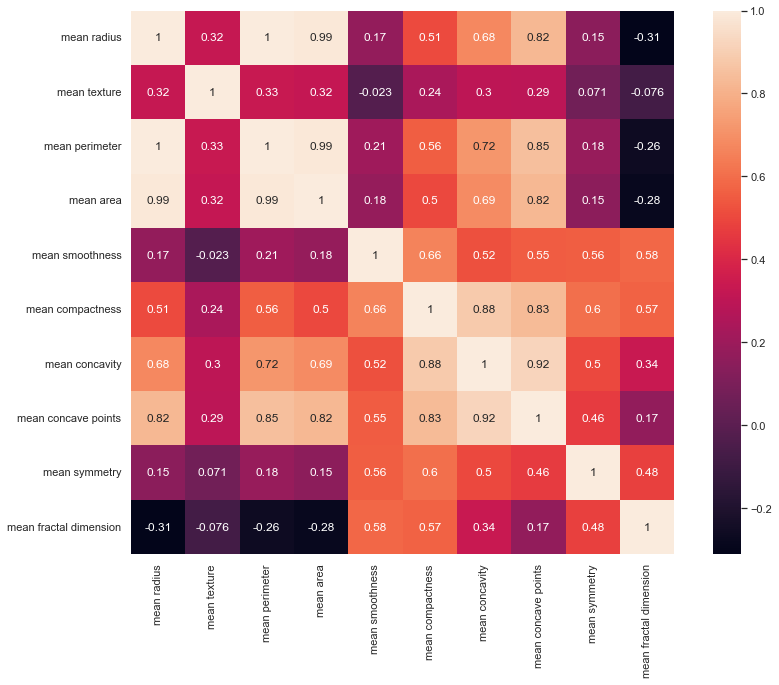

In [7]:
#https://www.kaggle.com/code/djokester/visualising-the-breast-cancer-wisconsin-data-set/notebook
sns.set(rc={'figure.figsize':(14,10)})
sns.heatmap(df.iloc[:,0:10].corr(), vmax=1, square=True, annot=True)

<AxesSubplot:>

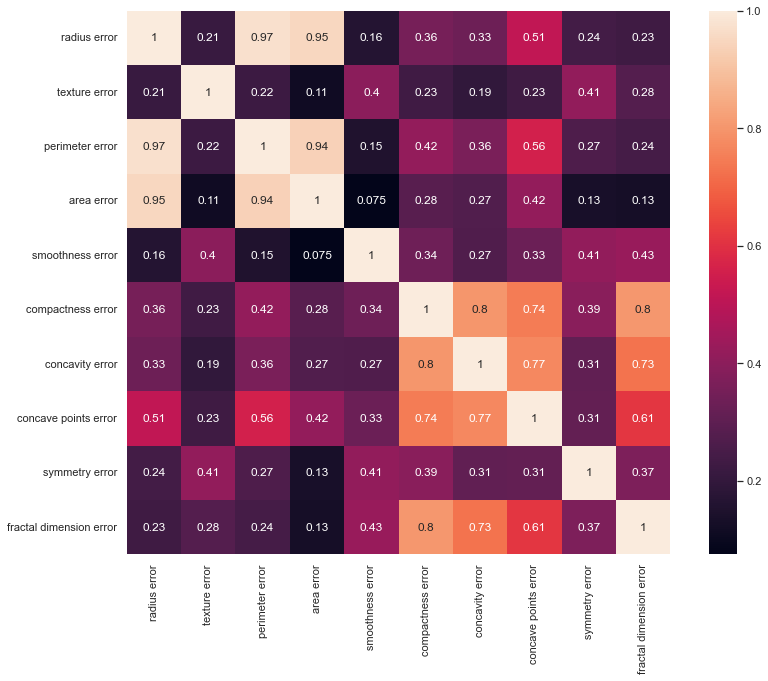

In [8]:
sns.heatmap(df.iloc[:,10:20].corr(), vmax=1, square=True, annot=True)

<AxesSubplot:>

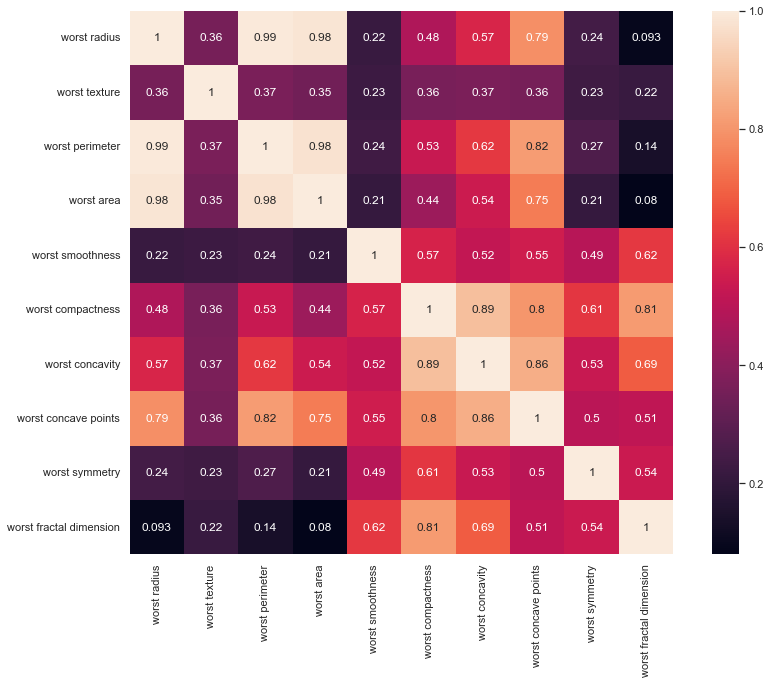

In [9]:
sns.heatmap(df.iloc[:,20:30].corr(), vmax=1, square=True, annot=True)

Next we look at the distributions of the data. This will help us develop an understanding of what distributions each variable follows. We expect most to be normally distributed but they may be some that are heavily skewed or more uniform that will require a different distribution to model.

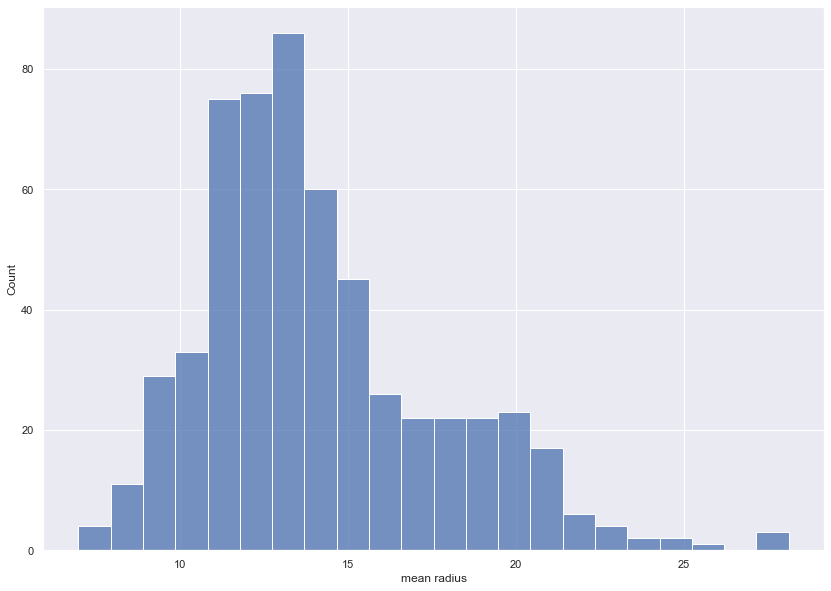

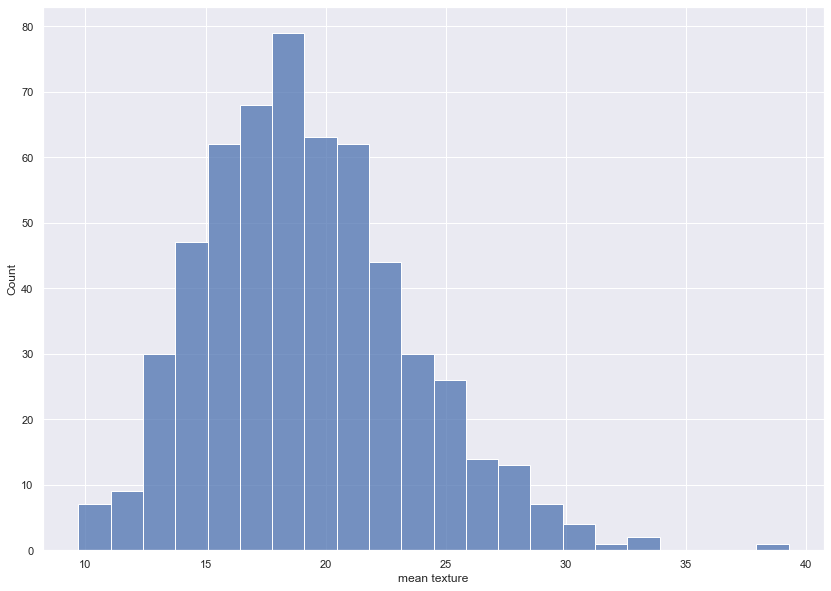

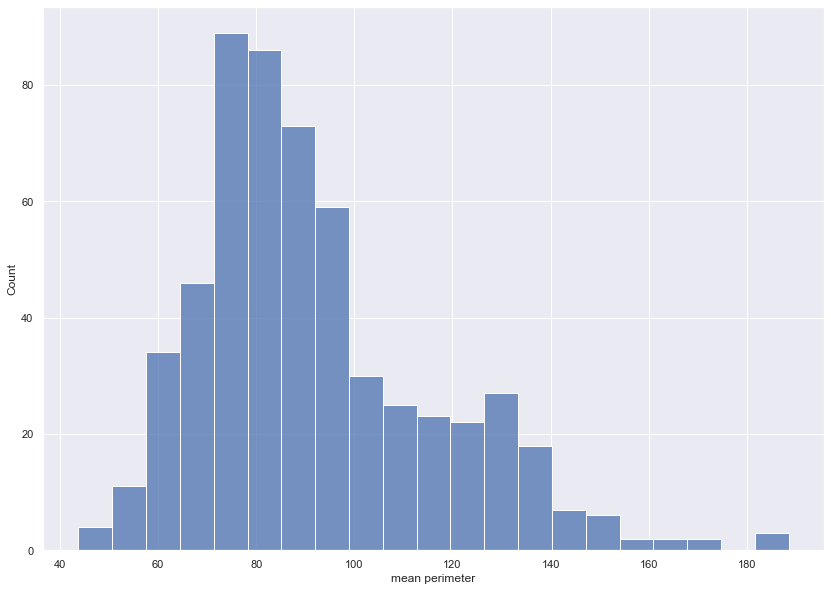

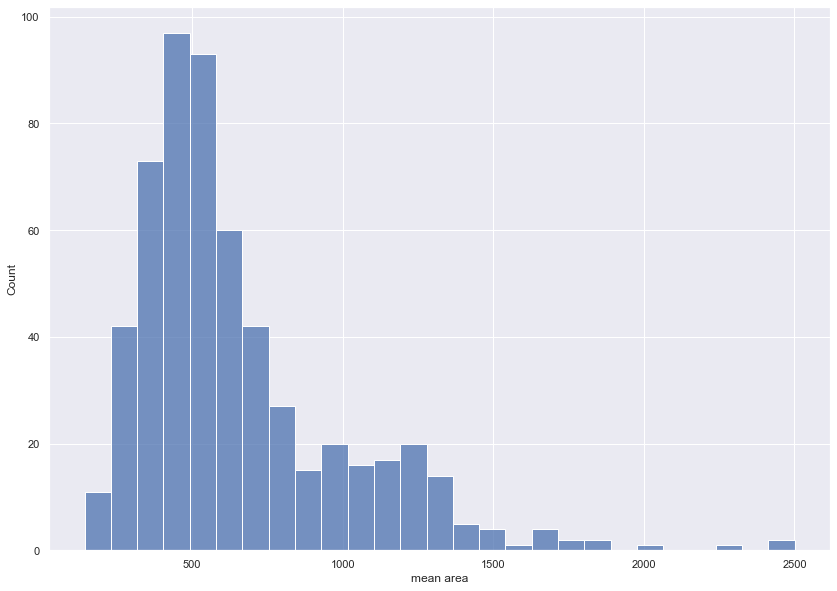

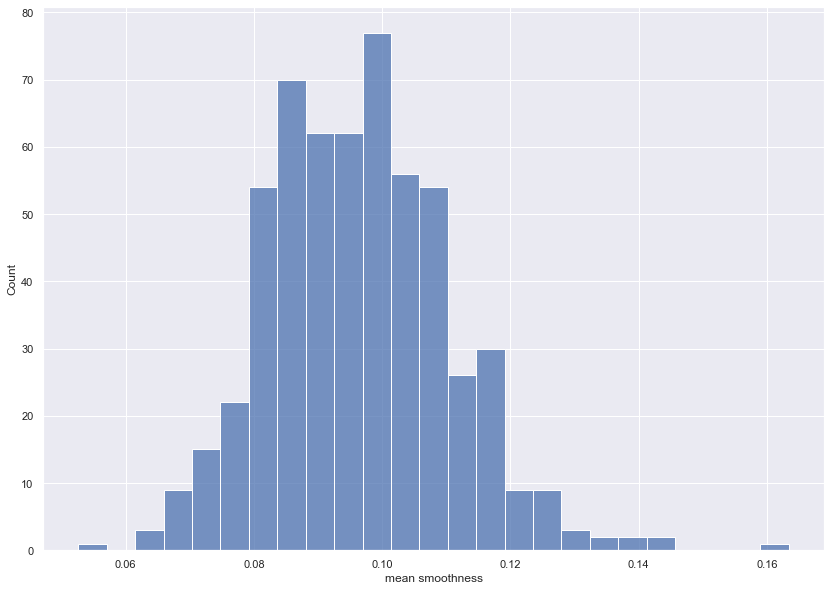

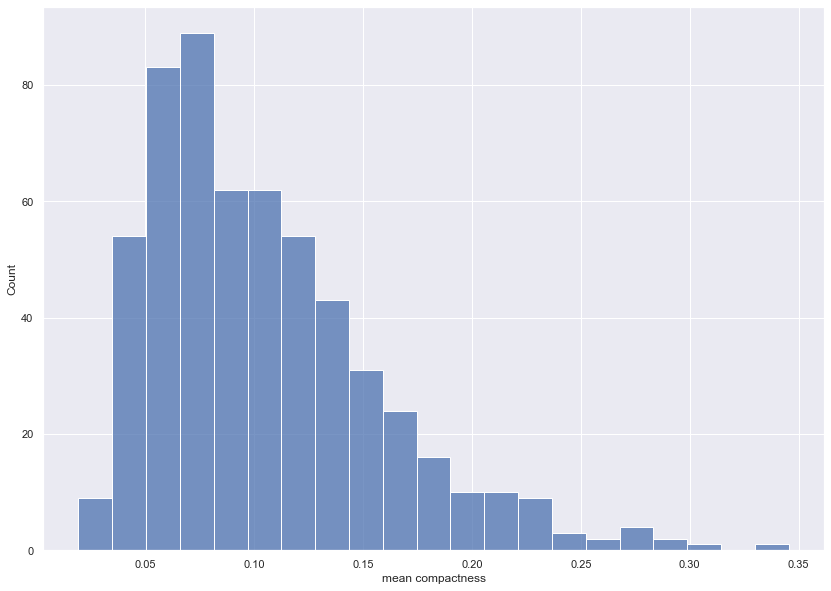

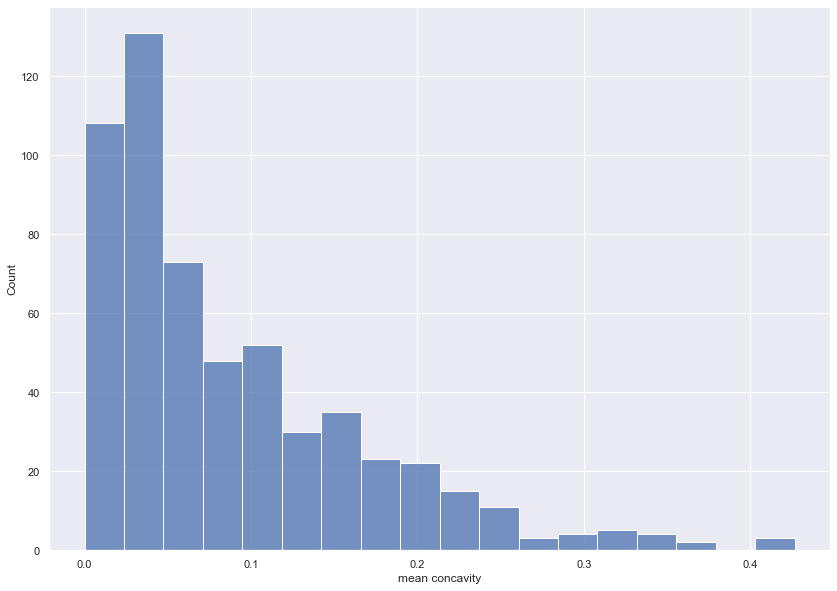

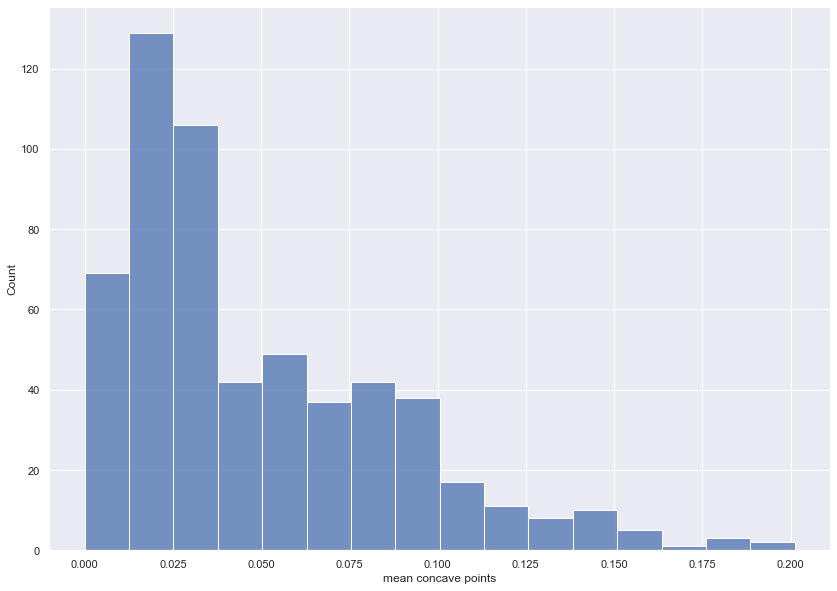

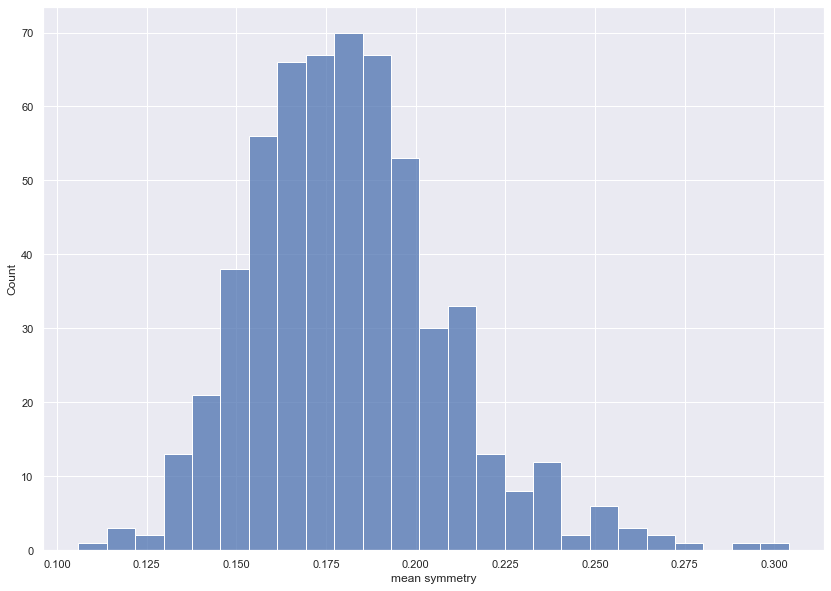

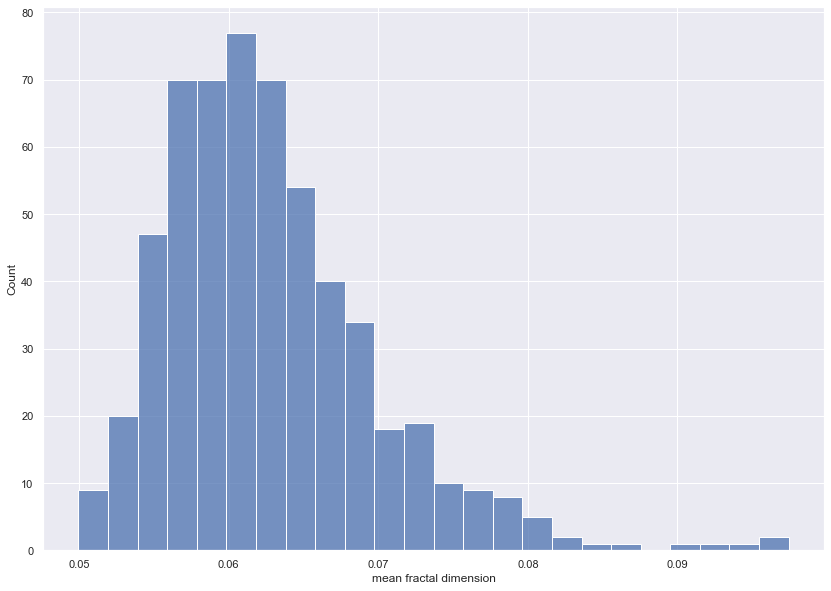

In [10]:
for i in range(0,10):
    plt.figure()
    sns.histplot(df.iloc[:,i])

We can now use boxplots to visualise the spread of the data and any outliers. I have included strip plots to help further illustrate how the datapoints are situated within the dataset.

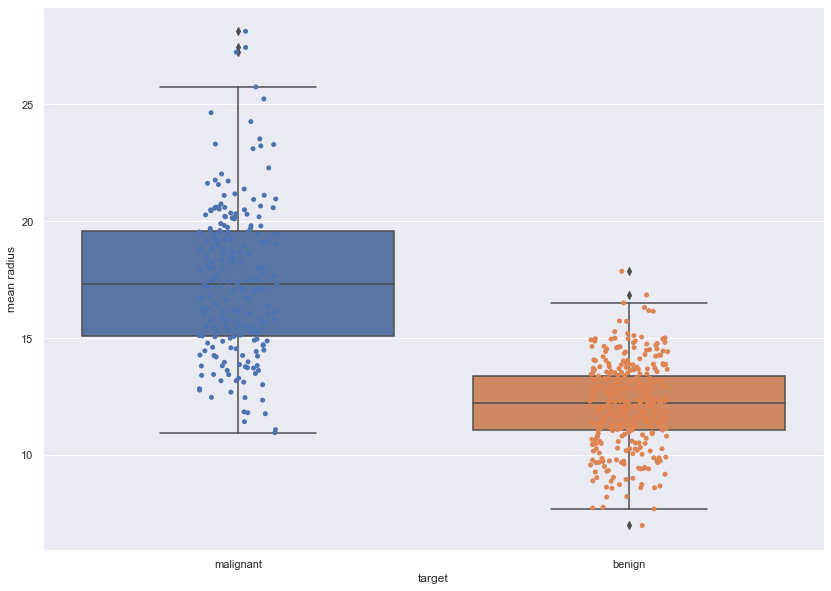

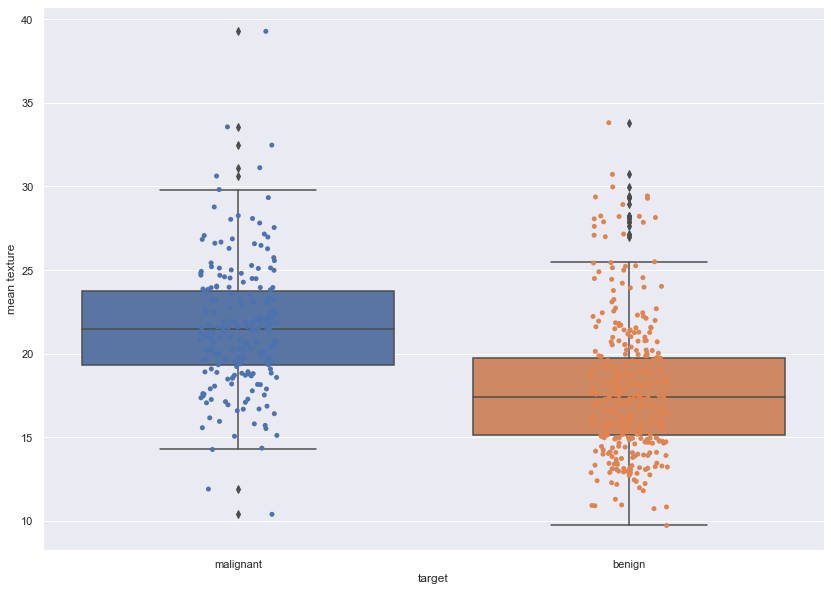

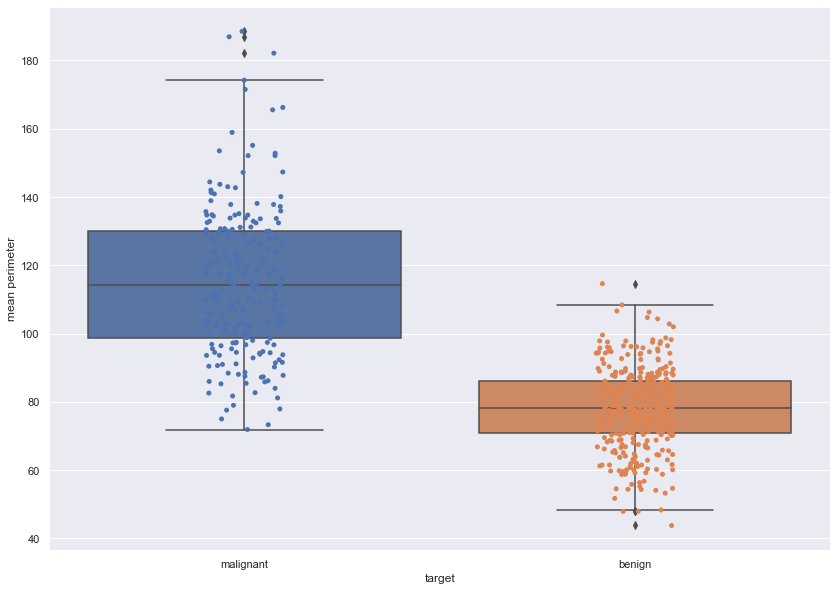

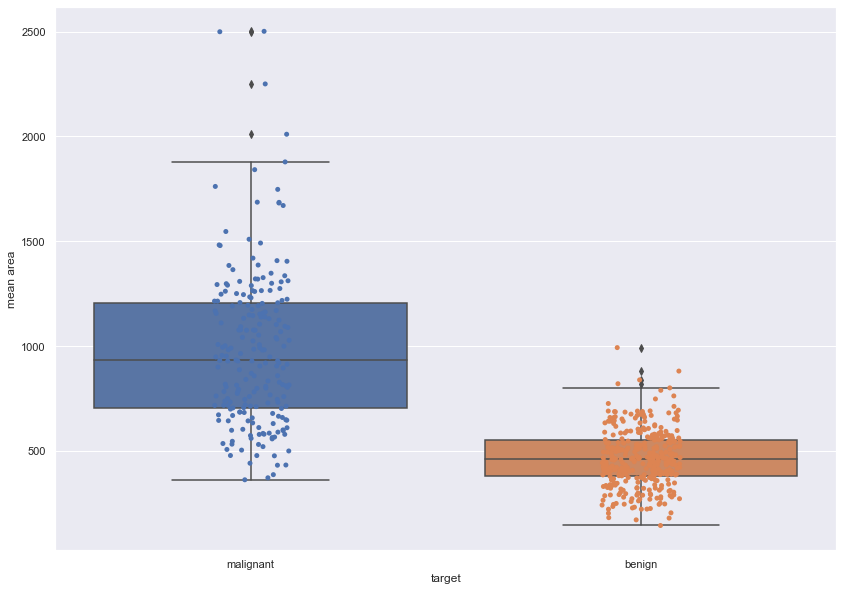

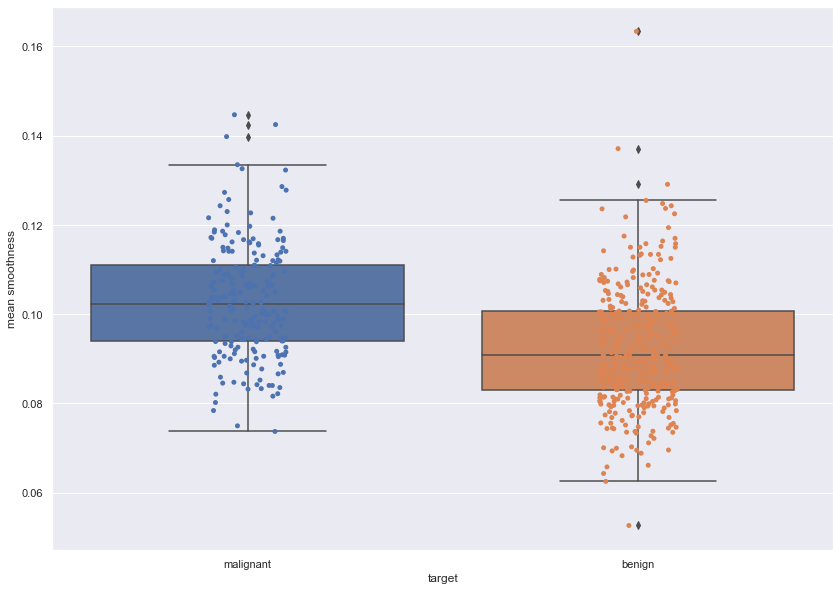

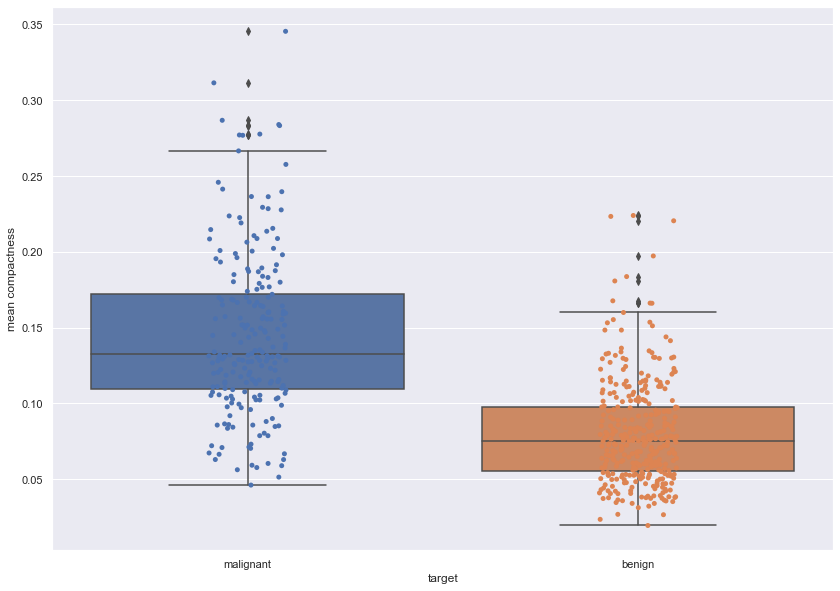

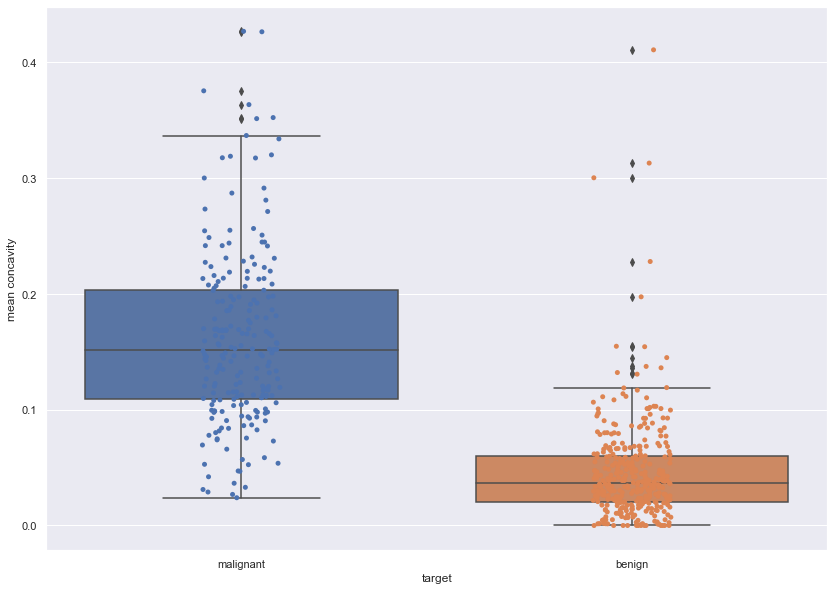

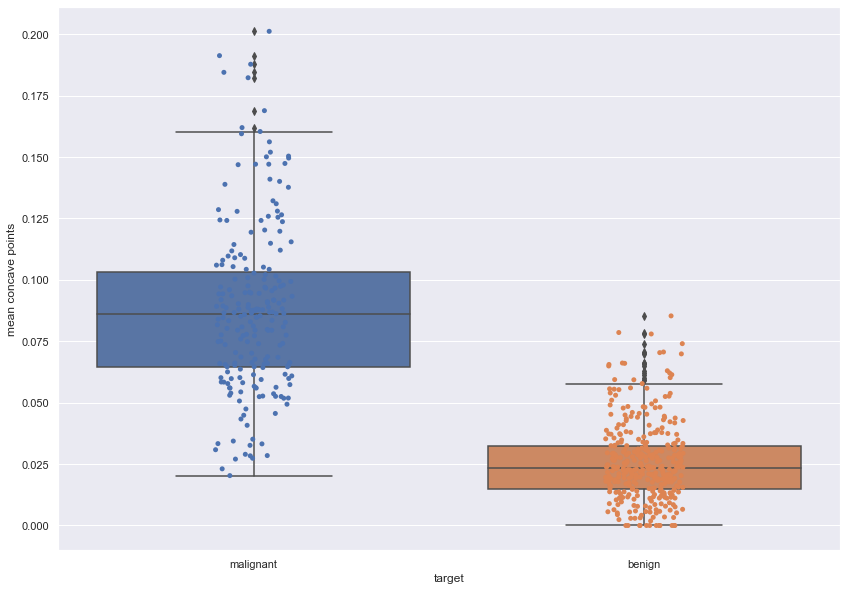

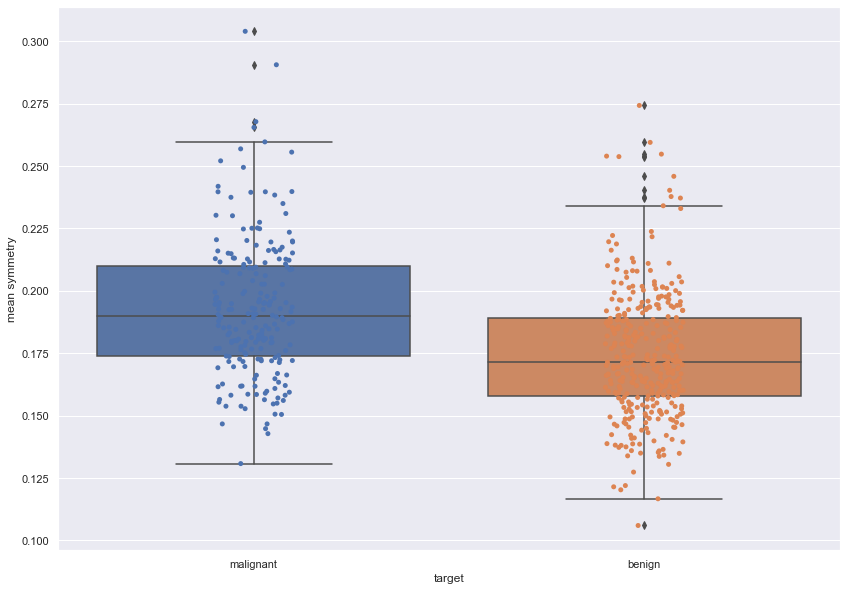

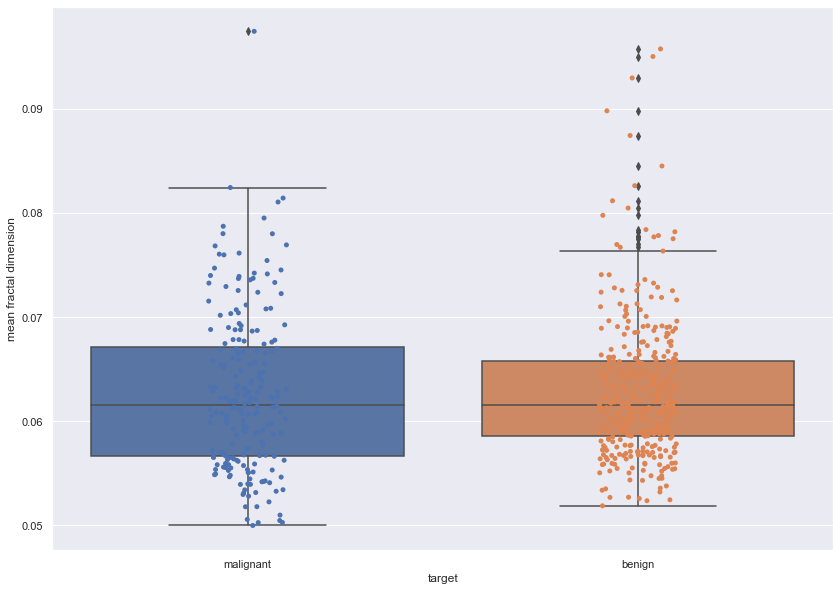

In [11]:
for i in range(0,10):
    plt.figure()
    #sns.stripplot(x=df['target'], y= df.iloc[:,i], jitter=True)
    #sns.boxplot(dataM.iloc[:,i])
    ax=sns.boxplot(x=df['target'],y=df.iloc[:,i])
    ax=sns.stripplot(x=df['target'],y= df.iloc[:,i],jitter=True,edgecolor='gray')
    ax.set_xticklabels(data.target_names)

We will compare 4 different machine learning algorithms using the breast cancer dataset. For the purposes of this test, I have set the test/train split to 30/70. Once each algorithm is coded I will then run 1000 iterations of each test to determine the average accuracy and stability. The 4 algorithms chosen are K nearest neighbours, Perceptron, Support Vector Machines and Decision Tree. 

## K Nearest Neighbours

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, train_size=0.7)

In [13]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
print(neigh.predict(X_test))

[0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0
 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0]


In [15]:
print(np.array(y_test))

[0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0
 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0
 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0]


Next, we compare the predictions and the actual results from the dataset (y_test). By subtracting one Numpy array from the other, any differences between the arrays will show as either -1 or 1. Squaring the resulting array makes all the differences positive 1.

In [16]:
x = ((neigh.predict(X_test)-np.array(y_test))**2)
print(x)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


We can now count the number of errors in the predictions and the number of elements in the test dataset.

In [17]:
print('The number of errors in the predictions is {}.'.format(sum(x)))
print('The number of elements in the test dataset is {}.'.format(len(x)))

The number of errors in the predictions is 12.
The number of elements in the test dataset is 171.


Using the figures in the previous cell, we can calculate the test accuracy.

In [18]:
testAccuracy = 1 - (sum(x)/len(x))
print('The accuracy of the K Nearest Neighbours model is {}%'.format(round(testAccuracy,4)*100))

The accuracy of the K Nearest Neighbours model is 92.97999999999999%


In [19]:
acc = []
for i in range(0, 1000):
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, train_size=0.7, shuffle=True)
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X_train, y_train)
    x = ((neigh.predict(X_test)-np.array(y_test))**2)
    testAccuracy = 1 - (sum(x)/len(x))
    acc.append(testAccuracy)

In [20]:
result = np.array(acc)

In [21]:
print('The average accuracy is {}%'.format(round(result.mean(),4)*100))
print('The average standard deviation is {}'.format(round(result.std(),4)*100))

The average accuracy is 92.99%
The average standard deviation is 1.66


<AxesSubplot:ylabel='Count'>

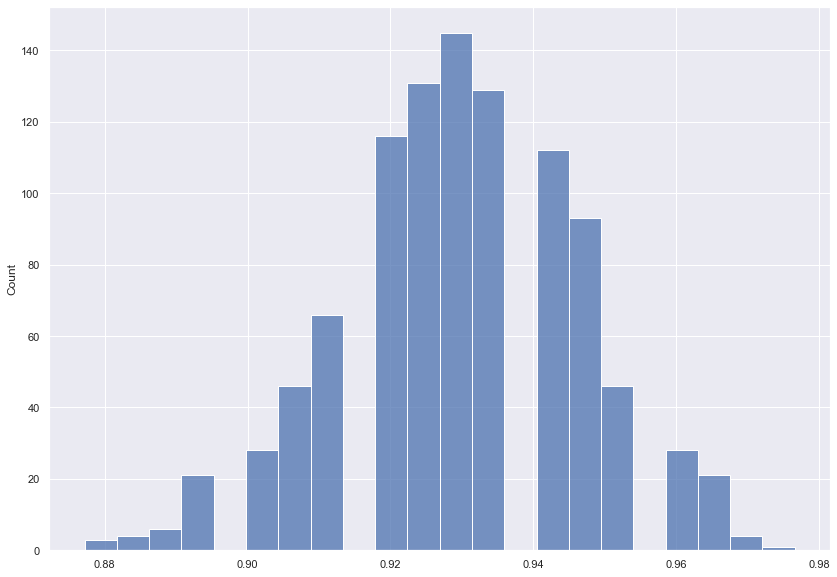

In [22]:
sns.histplot(result)

## Perceptron 

In [23]:
clf = Perceptron(tol=1e-3, random_state=0)

In [24]:
clf.fit(X_train, y_train)

Perceptron()

In [25]:
clf.score(X_test, y_test)

0.9181286549707602

In [26]:
percep = []
for i in range(0,1000):
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, train_size=0.7, shuffle=True)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    percep.append(score)
    
perResult = np.array(percep)

In [27]:
print('The average accuracy is {}%'.format(round(perResult.mean(),4)*100))
print('The average standard deviation is {}'.format(round(perResult.std(),4)*100))

The average accuracy is 85.42%
The average standard deviation is 9.26


<AxesSubplot:ylabel='Count'>

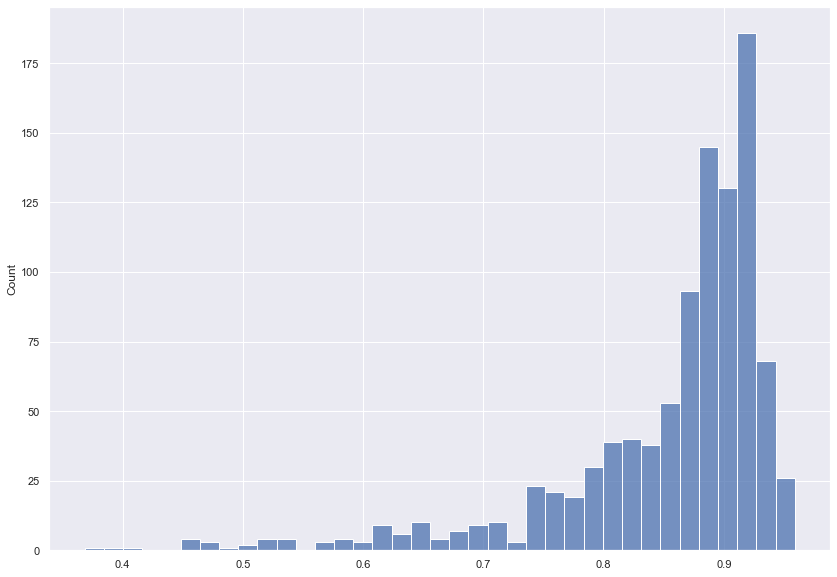

In [28]:
sns.histplot(perResult)

## Support Vector Machines

In [29]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [30]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [31]:
print(np.array(y_test))

[1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0
 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1
 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1
 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1
 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0]


In [32]:
x = ((clf.predict(X_test)-np.array(y_test))**2)
print(x)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]


In [33]:
print('The number of errors in the predictions is {}.'.format(sum(x)))
print('The number of elements in the test dataset is {}.'.format(len(x)))

The number of errors in the predictions is 14.
The number of elements in the test dataset is 171.


In [34]:
testAccuracy = 1 - (sum(x)/len(x))
print('The accuracy of the Support Vector Machines model is {}%'.format(round(testAccuracy,4)*100))

The accuracy of the Support Vector Machines model is 91.81%


In [35]:
svmList = []
for i in range(0, 1000):
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, train_size=0.7, shuffle=True)
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    x = ((clf.predict(X_test)-np.array(y_test))**2)
    testAccuracy = 1 - (sum(x)/len(x))
    svmList.append(testAccuracy)

In [36]:
svmResult = np.array(svmList)

In [37]:
print('The average accuracy is {}%'.format(round(svmResult.mean(),4)*100))
print('The average standard deviation is {}%'.format(round(svmResult.std(),4)*100))

The average accuracy is 91.25%
The average standard deviation is 2.08%


<AxesSubplot:ylabel='Count'>

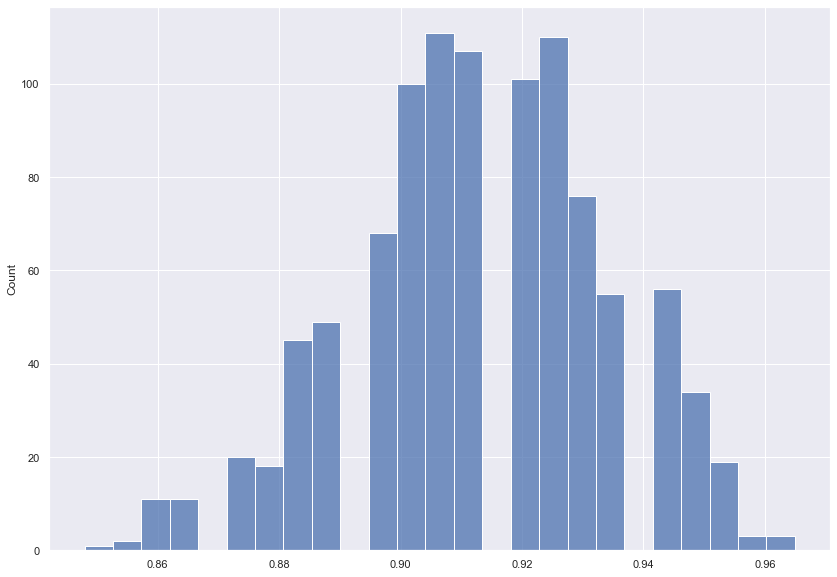

In [38]:
sns.histplot(svmResult)

## Decision Tree

In [39]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [40]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1])

In [41]:
x = ((clf.predict(X_test)-np.array(y_test))**2)
print(x)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [42]:
print('The number of errors in the predictions is {}.'.format(sum(x)))
print('The number of elements in the test dataset is {}.'.format(len(x)))

The number of errors in the predictions is 9.
The number of elements in the test dataset is 171.


In [43]:
testAccuracy = 1 - (sum(x)/len(x))
print('The accuracy of the Decision Tree model is {}%'.format(round(testAccuracy,4)*100))

The accuracy of the Decision Tree model is 94.74000000000001%


In [44]:
dtList = []
for i in range(0, 1000):
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, train_size=0.7, shuffle=True)
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train, y_train)
    x = ((clf.predict(X_test)-np.array(y_test))**2)
    testAccuracy = 1 - (sum(x)/len(x))
    dtList.append(testAccuracy)

In [45]:
dtResult = np.array(dtList)

In [46]:
print('The average accuracy is {}%'.format(round(dtResult.mean(),4)*100))
print('The average standard deviation is {}%'.format(round(dtResult.std(),4)*100))

The average accuracy is 92.5%
The average standard deviation is 1.9300000000000002%


<AxesSubplot:ylabel='Count'>

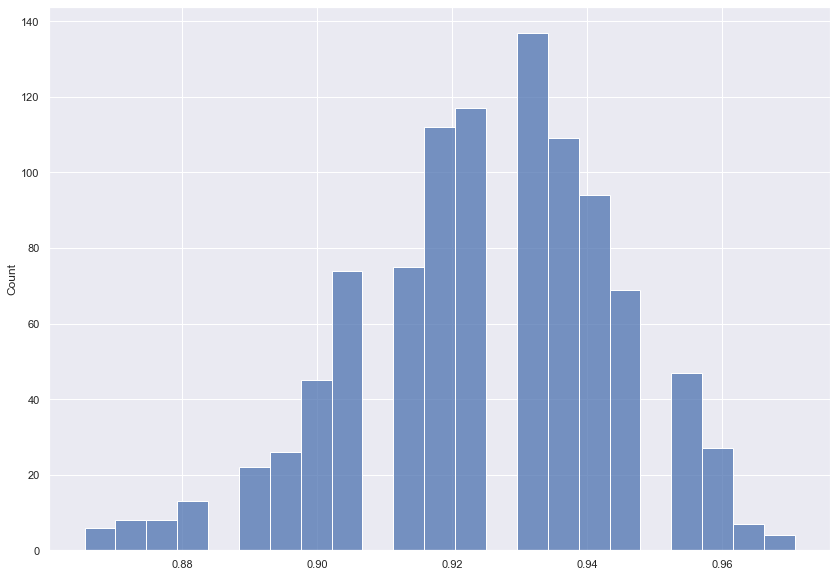

In [47]:
sns.histplot(dtResult)

The K nearest neighbours, Decision Tree and Support Vector Machines performed reasonably well and with almost identical accuracy. The Perceptron performed noticeably poorer, with a significantly larger standard deviation. While the study examined earlier had a lot of success with the Multilayer Perceptron, the standard Perceptron would require much adjustment before it could be considered reliable. 

## Synthetic data

From examining the histograms generated when exploring the dataset we can see that most are normally distributed but some are heavily right skewed. Their shape approximates the gamma distribution and so we will use that to generate synthetic for any variable not normally distributed. The correct parameters for the gamma distributions will be determined by trial and error.

In [48]:
rng = np.random.default_rng()

In [49]:
#mean radius - normal distribution
rad = rng.normal(df.iloc[:,0].mean(), df.iloc[:,0].std(), 100)

In [50]:
#mean texture - normal distribution
text = rng.normal(df.iloc[:,1].mean(), df.iloc[:,1].std(), 100)

In [51]:
#mean perimeter - normal distribution
per = rng.normal(df.iloc[:,2].mean(), df.iloc[:,2].std(), 100)

In [52]:
#mean area - gamma distribution
area = rng.gamma(3, 1, 100)*250

In [53]:
#mean smoothness - normal distribution
smooth = rng.normal(df.iloc[:,4].mean(), df.iloc[:,4].std(), 100)

In [54]:
#mean compactness - gamma distribution
comp = rng.gamma(3, 1, 100)/2.4

In [55]:
#mean concavity - gamma distribution
conc = rng.gamma(1.5, 0.5, 100)/7.5

In [56]:
#mean concave points - gamma distribution
conp = rng.gamma(2, 2, 100)/75

In [57]:
#mean symmetry - normal distribution
sym = rng.normal(df.iloc[:,8].mean(), df.iloc[:,8].std(), 100)

In [58]:
#mean fractal dimension - normal distribution
fd = rng.normal(df.iloc[:,9].mean(), df.iloc[:,9].std(), 100)

In [59]:
synData = np.transpose([rad, text, per, area, smooth, comp, conc, conp, sym, fd])

In [60]:
#generate a dataframe using the numpy arrays created above
synDataDf = pd.DataFrame(synData, columns=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave parts', 'mean symmetry', 'mean fractal dimension'])

In [61]:
synDataDf

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave parts,mean symmetry,mean fractal dimension
0,18.314497,23.362857,63.663732,167.745575,0.092739,1.044457,0.002641,0.088979,0.191103,0.072416
1,15.812550,19.068502,134.782847,347.872505,0.094667,0.894270,0.139547,0.013249,0.158420,0.053102
2,10.475770,12.581778,121.695406,1370.260554,0.115749,0.479186,0.158483,0.028678,0.193317,0.061660
3,13.552003,15.527915,72.484088,447.543696,0.098620,0.243269,0.085034,0.072921,0.149290,0.057756
4,16.404583,20.459768,70.921347,855.370897,0.092042,0.208691,0.078323,0.007528,0.212929,0.061415
...,...,...,...,...,...,...,...,...,...,...
95,12.471627,24.472184,59.944878,351.035213,0.085838,2.447068,0.086806,0.055767,0.215805,0.066362
96,12.583746,28.131083,49.811182,209.185360,0.079754,1.095112,0.031477,0.013379,0.164484,0.072246
97,10.299744,22.342368,80.929812,465.989770,0.065049,0.956110,0.019124,0.013121,0.209922,0.059326
98,16.100066,16.308450,66.492425,1270.710012,0.079582,1.339659,0.037505,0.046461,0.197334,0.046450


Text(0.5, 1.0, 'Synthetic dataset')

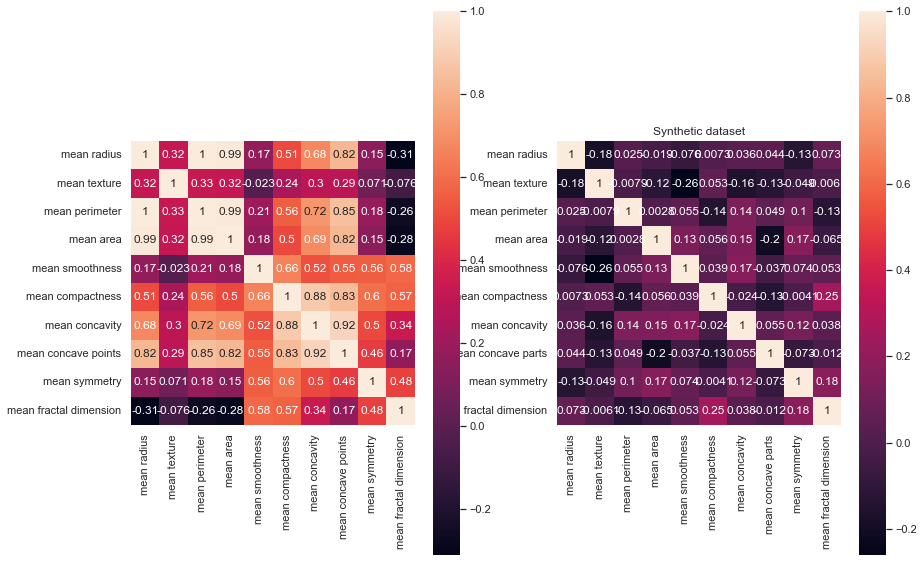

In [62]:
#https://stackoverflow.com/questions/50947776/plot-two-seaborn-heatmap-graphs-side-by-side

fig, (ax1, ax2) = plt.subplots(1,2)

sns.heatmap(df.iloc[:,0:10].corr(), vmax=1, square=True, annot=True, ax=ax1)
sns.heatmap(synDataDf.iloc[:,0:10].corr(), vmax=1, square=True, annot=True, ax=ax2)
plt.title('Synthetic dataset')

By comparing the heatmap of the original data to the synthetic data, we can see that the synthetic data has very poor correlation. This is certainly due to the fact that data was generated randomly insofar as no variables influenced any other variables. This is an indication that we will need to consider the relationships in the original dataset when synthesising data. 